# Geometric Brownanian process

$\frac{dS_t}{S_0} = \mu dt + \sigma dW_t$
Here, 

$S_0$ is the initial stock price,

$S_t$ is the stock price after time t.

$\mu dt$ is the Expected return, as $\mu$ is called the drift rate.

$\sigma$ is the volatitility 

$dW_t$ is the Change in Brownanian motion term.

The way the following program runs, is that for every paths it creates a price vector of the stock everyday for a year. The initial stock price is assumed to be 100, and other parameters like drift rate and the volatility are also assumed. 
The, a random term $dW_t$ from the normal distribution is added to the price on every interation to give the option price after appropriate iterations.


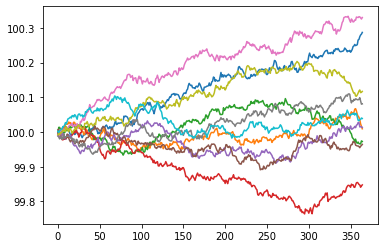

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math


class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Brownian motion
            dYt = self.drift*self.dt + self.volatility*dWt  # Change in price
            self.current_price += dYt  # Add the change to the current price
            self.prices.append(self.current_price)  # Append new price to series
            self.T -= self.dt  # Accound for the step in time

    def __init__(self, initial_price, drift, volatility, dt, T):
        self.current_price = initial_price
        self.initial_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

# Model Parameters
paths = 10
initial_price = 100
drift = .08
volatility = .1
dt = 1/365
T = 1
price_paths = []

# Generate a set of sample paths
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)

# Plot the set of generated sample paths
for price_path in price_paths:
    plt.plot(price_path)
plt.show()